## Numerická derivace


V tomto cvičení si ukážeme jak provádět derivaci funkci v nějakém bodě, nalézt její symbolický předpis, nalézt předpis limity a procvičíme si znalosti z předchozích hodin.

In [2]:
import scipy
import sympy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!python -m pip install ipywidgets

In [3]:
from ipywidgets import interact

def f(x):                                       # definice funkce f(x) = x^2 - 3
    return x ** 3 + 1

x0 = 1                                          # bod x0
x1 = 3                                          # koncové x

x = np.linspace(x0, x1, 100)                    # generování hodnot x pro vykreslení grafu
y_f = f(x)                                      # hodnoty funkce f(x) pro dané x

y0 = np.min(y_f)                                # krajní body grafu
if y0 > 0:
    y0 = 0
y1 = np.max(y_f)
h = 1                                           # krok h

def plot_graph(h):
    k = (f(x0+h) - f(x0)) / h                   # výpočet směrnice sečny
    q = f(x0) - k*x0                            # výpočet konstanty

    plt.plot(x, y_f, label='f(x) = x^2 - 3')    # vykreslení grafu funkce f(x) 
    plt.plot([x0, x1], [f(x0), k*x1+q], 'r--')  # sečna
    plt.plot(x0, f(x0), 'ro')                   # červený bod v bodě x0
    plt.plot(x0 + h, f(x0 + h), 'ro')           # červený bod v bodě x0 + h
    plt.plot([x0, x0+h], [f(x0), f(x0)], "m:")  # delta x a delta y
    plt.plot([x0+h, x0+h], [f(x0), f(x0+h)], "m:")

    plt.text(x0, f(x0), r'$x_0$', fontsize=12, verticalalignment='bottom')              # popiska x0
    plt.text(x0 + h, f(x0+h), r'$x_0 + h$', fontsize=12, verticalalignment='bottom')    # popiska x0 + h

    plt.axis([x0, x1, y0, y1])                  # nastavení rozsahů (xmin, xmax, ymin, ymax)
    plt.axhline(y = 0, color='k')               # vykreslení osy x
    plt.xlabel('x')                             # popisky os
    plt.ylabel('y')

    plt.grid(True)
    plt.show()

# Vytvoření slideru a jeho propojení s funkcí pro vykreslení grafu
interact(plot_graph, h=(0.001, 1.9, 0.1))
plt.show();


interactive(children=(FloatSlider(value=0.901, description='h', max=1.9, min=0.001), Output()), _dom_classes=(…

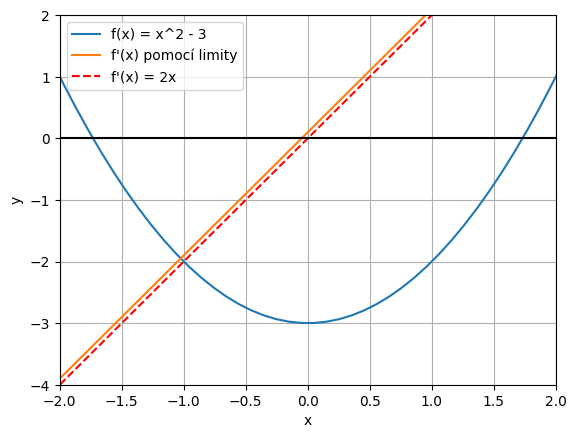

In [3]:
def f(x):                               # definice funkce f(x) = x^2 - 3
    return x ** 2 - 3
def derivace(x):                        # definice derivace funkce f(x) pomocí limity
    h = 0.1                             # malý krok pro výpočet limity (např. 0.001)
    return (f(x + h) - f(x)) / h
def df(x):                              # definice derivace funkce f'(x) = 2x
    return 2 * x


x = np.linspace(-5, 5, 100)             # generování hodnot x pro vykreslení grafu
y_f = f(x)                              # hodnoty funkce f(x) pro dané x
y_df = df(x)                            # hodnoty derivace f(x) pro dané x
y_derivace = [derivace(xi) for xi in x] # hodnoty derivace f(x) pro dané x pomocí definice derivace jako limity

plt.plot(x, y_f, label='f(x) = x^2 - 3')    # vykreslení grafu funkce f(x) 
plt.plot(x, y_derivace, label="f'(x) pomocí limity")
plt.plot(x, y_df, "r--", label="f'(x) = 2x")   # vykreslení grafu derivace f'(x)
plt.axis([-2, 2, -4, 2])                # nastavení rozsahů (xmin, xmax, ymin, ymax)
plt.axhline(y = 0, color='k')           # vykreslení osy x

plt.xlabel('x')                         # popisky os
plt.ylabel('y')
plt.legend()
plt.grid(True)                          # mřížka
plt.show()


#### Taylorova věta

Hledáme funkci $g$, která nejlépe aproximuje funkci $f$ tak, aby platilo:
$$f(c)=g(c), f'(c)=g'(c), ..., f^{(n)}(c)=g^{(n)}(c)$$
Rozvoj funkce $f(x)$ v bodě c
$$f(x)=f(c)+\frac{f'(c)}{1!}(x-c)+...+\frac{f^n(c)}{n!}(x-c)^n+...$$

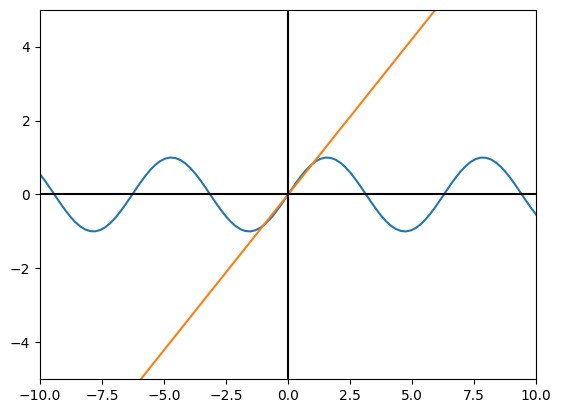

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)
degree = 1                                                          # stupeň Taylorova polynomu

plt.plot(x, np.sin(x))                                              # původní fce
sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1)    # jaká fce (sin), v jakém bodě (x=0), stupeň, šířka intervalu (v jakém okolí má nahradit)
plt.plot(x, sin_taylor(x))

plt.axis([-10, 10, -5, 5])                                          # rozsahy os (x, y) - pokud např. chceme výřez
plt.axhline(y = 0, color='k')                                       # vykreslení osy x
plt.axvline(x = 0, color='k')                                       # vykreslení osy y
plt.show()

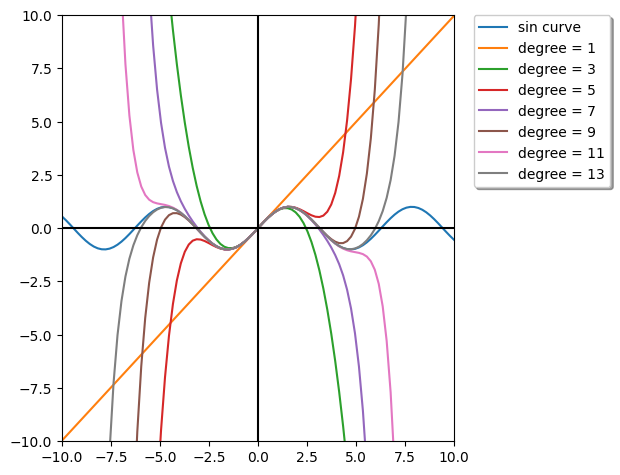

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)

plt.plot(x, np.sin(x), label="sin curve")

for degree in np.arange(1, 15, step=2):             # 1, 3, 5 ... 13
    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1, order=degree + 2) # order - řád polynomu; pokud není, je použit degree
    plt.plot(x, sin_taylor(x), label=f"degree = {degree}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, shadow=True)
plt.axhline(y = 0, color='k')                                       # vykreslení osy x
plt.axvline(x = 0, color='k')                                       # vykreslení osy y
plt.tight_layout()
plt.axis([-10, 10, -10, 10])
plt.show()

#### Symbolické manipulace

<!--img src="MS10_soubory/symuprava1.png" alt="Drawing" style="width: 600px;"/-->

<font color='green'>Pomocí symbolických manipulací upravte následující výraz</font>
$$\frac{1-\frac{x}{y}}{\frac{x-y^2}{x}}$$

In [6]:
x, y = sympy.symbols('x y')
sympy.simplify((1-x/y)/(x-y**2/x))

-x/(y*(x + y))

#### Limity

In [7]:
x, y = sympy.symbols('x y')
vyraz = x*x - 2*x*y
x0 = 0
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)
print(sympy.limit(1/x,x,0, dir="+-"))

0
zoo


In [8]:
lim = sympy.Limit(vyraz, x, x0)
lim

Limit(x**2 - 2*x*y, x, 0, dir='+')

In [9]:
lim.doit()

0

<font color='green'>Pomocí symbolické matematiky vypočítejte následující limity</font>
$$\begin{align*}
&\lim\limits _{x\rightarrow3} ^{} \frac{2x^3-1}{x^2-2x+10}\\
&\lim\limits _{x\rightarrow2-} ^{} \frac{x^2+x-2}{x-2}\\
&\lim\limits _{x\rightarrow 0} ^{} e^{\frac{1}{sin(x)}}\\
&\lim\limits _{x\rightarrow e} ^{} \frac{ln(x)-1}{x-e}
\end{align*}$$

In [10]:
x = sympy.symbols('x')
vyraz = (2*x**3 - 1)/(x**2 - 2*x + 10)
x0 = 3
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)

53/13


In [22]:
x = sympy.symbols('x')
vyraz = (x**2 + x - 2)/(x - 2)
x0 = 2
limita_vyrazu = sympy.limit(vyraz, x, x0, dir='-')
print(limita_vyrazu)

-oo


In [11]:
x = sympy.symbols('x')
vyraz = sympy.exp(1/sympy.sin(x))
x0 = 0
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)

limita_vyrazu = sympy.limit(vyraz, x, x0, dir='-')
print(limita_vyrazu)

oo
0


In [24]:
x = sympy.symbols('x')
vyraz = (sympy.log(x) - 1)/(x-sympy.E)
x0 = sympy.E
limita_vyrazu = sympy.limit(vyraz, x, x0)
print(limita_vyrazu)

exp(-1)


### Výpočet derivace

<!--img src="MS10_soubory/vypocetderivace.png" alt="Drawing" style="width: 600px;"/-->

- analyticky
$$
f'(c)=\lim\limits _{h\rightarrow0} ^{} \frac{f(c+h)-f(c)}{h}
$$
- přibližný výpočet - numerická derivace
$$f'(c)=\frac{f(c+h)-f(c)}{h}+O(h^2)$$

#### Analytický výpočet derivace

In [12]:
x, y = sympy.symbols('x y')
vyraz = x*x - 2*x*y

derivace_vyrazu = sympy.diff(vyraz, x)      # pokud jen jedna proměnná, není 2. argument nutný
print(derivace_vyrazu)
derivace_vyrazu

2*x - 2*y


2*x - 2*y

In [26]:
vyraz1 = x*x - 2*x
dce = sympy.Derivative(vyraz1, x)                   # výpis derivace
dce


Derivative(x**2 - 2*x, x)

In [27]:
dce.doit()

2*x - 2

In [13]:
vyraz2 = x*x - 2*x*y
dce = sympy.Derivative(vyraz2, x)                   # výpis parciální derivace
dce

Derivative(x**2 - 2*x*y, x)

In [29]:
dce.doit()

2*x - 2*y

#### Numerický výpočet derivace

In [16]:
#from scipy.misc import derivative
from scipy.optimize import approx_fprime

def f(x):
    return x**2 + 1

#derivative(f, 5, dx=1e-6)
scipy.optimize.approx_fprime(5, f, 1e-6)

array([10.000001])

#### FinDiff
Knihovna pro numerické derivace pomocí konečných diferencí a parciální diferenciální rovnice v libovolné dimenzi

In [ ]:
%pip install findiff

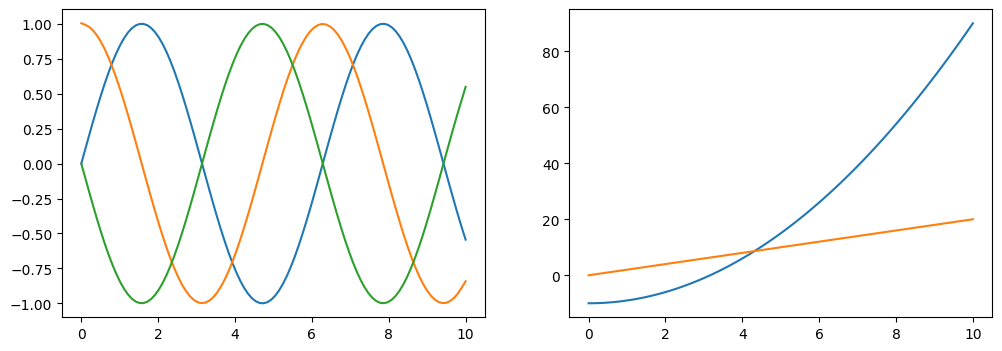

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from findiff import FinDiff     # finite difference
x = np.linspace(0, 10, 100)
f = np.sin(x)

def g(x):
    return x**2 - 10

y = g(x)                        # findiff nejde použít na funkci přímo
dx = x[1] - x[0]
d_dx = FinDiff(0, dx, 1)        # podle osy, diference, stupeň derivace
d2_dx2 = FinDiff(0, dx, 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))   # 12" šířka, 4" výška
ax1.plot(x, f)                  # 1. graf
ax1.plot(x, d_dx(f))
ax1.plot(x, d2_dx2(f))
ax2.plot(x, g(x))               # 2. graf
ax2.plot(x, d_dx(y))
plt.show()

#### Různé odhady derivace

\begin{align*}
f'(x_0)&=\frac{f(x_0+h)-f(x_0)}{h}\\
f'(x_0)&=\frac{f(x_0)-f(x_0-h)}{h}\\
f'(x_0)&=\frac{f(x_0+h)-f(x_0-h)}{2h}
\end{align*}


In [19]:
def forward_derivate(f, x0, h):
    return (f(x0+h) - f(x0))/h

def backward_derivate(f, x0, h):
    return (f(x0) - f(x0-h))/h

def central_derivate(f, x0, h):
    return (f(x0+h) - f(x0-h))/(2*h)

f = lambda x: x**2
x0 = 2
h = 0.1

print(forward_derivate(f, x0, h))
print(backward_derivate(f, x0, h))
print(central_derivate(f, x0, h))

4.100000000000001
3.9000000000000012
4.000000000000001


#### Derivace

<!--img src="MS10_soubory/odhadderivace.png" alt="Drawing" style="width: 600px;"/-->


Porovnejte dva numerické odhady derivace funkce $f(x)=sin(x)$ na intervalu $\langle0,\pi\rangle$ s přesným řešením získaným například pomocí symbolické matematiky.

Interval pro numerický odhad rozdělte na $n={4,8,12,16,20,30}$ subintervalů. Spočítejte celkovou chybu derivace jako
$$globErr=\sum\limits_{i=1}^{n}|f_i'-f'(x_i)|$$

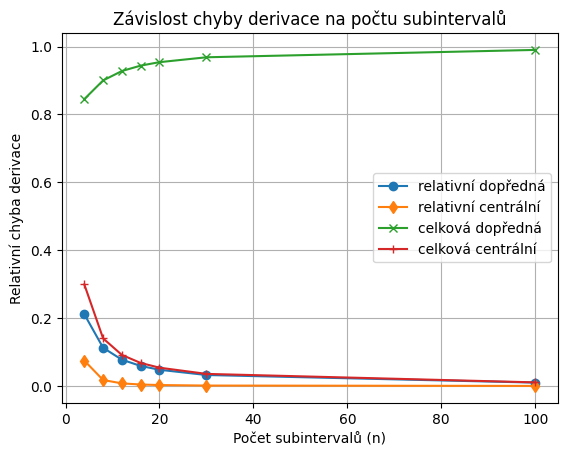

In [20]:
import sympy
import numpy as np

def forward_derivate(f, x0, h):             # dopředná
    return (f(x0+h) - f(x0))/h
def central_derivate(f, x0, h):             # centrální
    return (f(x0+h) - f(x0-h))/(2*h)

def err_forward(f, x0, h):                  # chyby
    return abs(forward_derivate(f, x0, h) - dx.evalf(subs={x: x0}))
def err_central(f, x0, h):
    return abs(central_derivate(f, x0, h) - dx.evalf(subs={x: x0}))


x = sympy.symbols('x')
dx = sympy.diff(sympy.sin(x), x)            # funkce pro sympy

f = lambda x: np.sin(x)                     # funkce pro numpy

xmin = 0
xmax = np.pi
ns = [4, 8, 12, 16, 20, 30, 100]

rel_forward = []
rel_central = []
glb_forward = []
glb_central = []
for n in ns:
    xs = np.linspace(xmin, xmax, n)
    h = (xmax-xmin)/n
    # pro každé x spočítat rozdíl num. a analytické, vše sečíst
    ge_forward = sum([err_forward(f, xi, h) for xi in xs])
    rel_forward.append(ge_forward/n)
    ge_central = sum([err_central(f, xi, h) for xi in xs])
    rel_central.append(ge_central/n)
    glb_forward.append(ge_forward)
    glb_central.append(ge_central)
    #print(f"počet intervalů: {n},\tchyba dopředné: {ge_forward},\tchyba central: {ge_central}")

# Vykreslení závislosti chyby na počtu subintervalů
plt.plot(ns, rel_forward, marker='o', label="relativní dopředná")
plt.plot(ns, rel_central, marker='d', label="relativní centrální")
plt.plot(ns, glb_forward, marker='x', label="celková dopředná")
plt.plot(ns, glb_central, marker='+', label="celková centrální")
plt.xlabel('Počet subintervalů (n)')
plt.ylabel('Relativní chyba derivace')
plt.title('Závislost chyby derivace na počtu subintervalů')
plt.grid(True)
plt.legend()
plt.show()

<font color="green">Pro výše uvedený příklad proveďte také odhad derivace ve třech bodech, například</font>
$$f^{\prime}(x_1+h) = \frac{f(x_1-h) - 4f(x_1) + 3f(x_1+h)}{2h}$$
<font color="green">a porovnejte přesnost s dvoubodovým odhadem.</font>


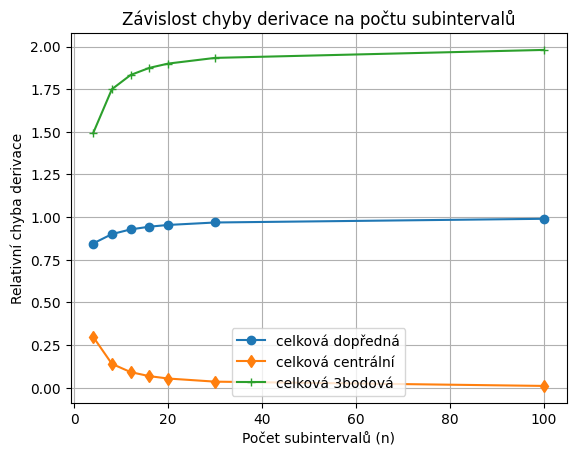

In [21]:
import sympy
import numpy as np

def forward_derivate(f, x0, h):             # dopředná
    return (f(x0+h) - f(x0))/h
def central_derivate(f, x0, h):             # centrální
    return (f(x0+h) - f(x0-h))/(2*h)

def threepoint_derivate(f, x0, h):
    return (f(x0-h) -4*f(x0) + 3*f(x0+h))/(2*h)
    #return (-3*f(x0) + 4*f(x0+h) - f(x0+2*h))/(2*h)

x = sympy.symbols('x')
dx = sympy.diff(sympy.sin(x), x)            # funkce pro sympy

f = lambda x: np.sin(x)                     # funkce pro numpy

xmin = 0
xmax = np.pi
ns = [4, 8, 12, 16, 20, 30, 100]

glb_forward = []
glb_central = []
glb_threepoint = []
for n in ns:
    xs = np.linspace(xmin, xmax, n)
    h = (xmax-xmin)/n
    # pro každé x spočítat rozdíl num. a analytické, vše sečíst
    ge_forward = sum([abs(forward_derivate(f, xi, h) - dx.evalf(subs={x: xi})) for xi in xs])
    ge_central = sum([abs(central_derivate(f, xi, h) - dx.evalf(subs={x: xi})) for xi in xs])
    ge_threepoint = sum([abs(threepoint_derivate(f, xi, h) - dx.evalf(subs={x: xi})) for xi in xs])
    glb_forward.append(ge_forward)
    glb_central.append(ge_central)
    glb_threepoint.append(ge_threepoint)
    #print(f"počet intervalů: {n},\tchyba dvoubodové: {ge_forward}\tchyba tříbodové: {ge_threepoint}")

# Vykreslení závislosti chyby na počtu subintervalů
plt.plot(ns, glb_forward, marker='o', label="celková dopředná")
plt.plot(ns, glb_central, marker='d', label="celková centrální")
plt.plot(ns, glb_threepoint, marker='+', label="celková 3bodová")
plt.xlabel('Počet subintervalů (n)')
plt.ylabel('Relativní chyba derivace')
plt.title('Závislost chyby derivace na počtu subintervalů')
plt.grid(True)
plt.legend()
plt.show()